In [1]:
#Pindah direktori ke direktori tempat data 
import os
path = 'E:\Daily Reanalisis ERA 5 v2'
os.chdir(path)

In [2]:
import warnings
warnings.simplefilter('ignore') #ignores simple warning

In [3]:
import numpy as np
import pandas as pd
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from tqdm import tqdm
import matplotlib.ticker as tk
import matplotlib.patches as mpatches
from scipy import stats

In [4]:
#Read time-event excel data
csevt=pd.read_excel('E:\. Disertasi S3 Bismillah\Olah Data\CS Lim Index V Based Event Data RM3.xlsx')
csevt=csevt.set_index('time_peak')

In [5]:
#Read MJO excel
mjoevt=pd.read_excel('data/MJO BOM.xlsx')
mjoevt=mjoevt.set_index('Tanggal')

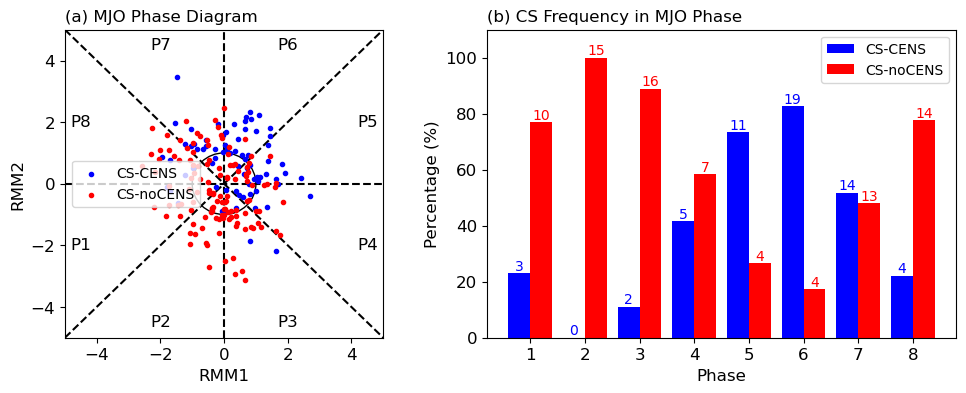

In [6]:
plt.figure(figsize=(11.5,4))
plt.subplot(131)
plt.title('(a) MJO Phase Diagram', fontsize=12, loc='left')
plt.xlabel('RMM1', fontsize=12)
plt.ylabel('RMM2', fontsize=12)
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
for i, clr, labels  in zip([1,0],['b','r'],['CS-CENS','CS-noCENS']):
    tslice=csevt.loc[csevt.index.month.isin([12,1,2])]
    tslice=tslice[tslice['censevt']==i].index.values
    dataplot=mjoevt.loc[tslice]
    plt.scatter(dataplot['RMM1'], dataplot['RMM2'], c=clr, marker=".", zorder=4, label=labels)

#Add line and circle
plt.axhline(y=0, linestyle='--', c='k', zorder=2)
plt.axvline(x=0, linestyle='--', c='k', zorder=2)
plt.axline(xy1=(0, 0), slope=1, linestyle='--', c='k', zorder=2)
plt.axline(xy1=(0, 0), slope=-1, linestyle='--', c='k', zorder=2)
circle1=plt.Circle((0, 0), (1), color='k', fill=False, zorder=2)
plt.gca().add_patch(circle1)


#Add phase information
plt.text(2, -4.5, 'P3', horizontalalignment='center', verticalalignment='center', fontsize=12)
plt.text(-2, -4.5, 'P2', horizontalalignment='center', verticalalignment='center', fontsize=12)
plt.text(-2, 4.5, 'P7', horizontalalignment='center', verticalalignment='center', fontsize=12)
plt.text(2, 4.5, 'P6', horizontalalignment='center', verticalalignment='center', fontsize=12)
plt.text(4.5, 2, 'P5', horizontalalignment='center', verticalalignment='center', fontsize=12)
plt.text(4.5, -2, 'P4', horizontalalignment='center', verticalalignment='center', fontsize=12)
plt.text(-4.5, 2, 'P8', horizontalalignment='center', verticalalignment='center', fontsize=12)
plt.text(-4.5, -2, 'P1', horizontalalignment='center', verticalalignment='center', fontsize=12)

plt.legend(loc='center left')
plt.subplot(122)
tslice=csevt.loc[csevt.index.month.isin([12, 1,2])]
tcscens=tslice[tslice['censevt']==1].index.values
datacscens=mjoevt.loc[tcscens]
datacscens=datacscens[datacscens['amplitude']>=1]
ncscens=[]
for ph in np.arange(1,8.1,1):
    ncscens.append(datacscens[datacscens['phase']==ph]['phase'].count())
ncscens=np.array(ncscens)
    
tcsncens=tslice[tslice['censevt']==0].index.values
datacsncens=mjoevt.loc[tcsncens]
datacsncens=datacsncens[datacsncens['amplitude']>=1]
ncsncens=[]
for ph in np.arange(1,8.1,1):
    ncsncens.append(datacsncens[datacsncens['phase']==ph]['phase'].count())
ncsncens=np.array(ncsncens)

plt.title('(b) CS Frequency in MJO Phase', fontsize=12, loc='left')
plt.xlabel('Phase', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
#plt.xlim([-5,5])
plt.ylim([0,110])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
barcens=plt.bar(np.arange(1,9,1)-0.2, ncscens/(ncscens+ncsncens)*100, color='b', width=0.4, label='CS-CENS')
barnocens=plt.bar(np.arange(1,9,1)+0.2, ncsncens/(ncscens+ncsncens)*100, color='r', width=0.4, label='CS-noCENS')
plt.legend()
plt.plot()
plt.bar_label(barcens, labels=ncscens, color='b')
plt.bar_label(barnocens, labels=ncsncens, color='r')

plt.subplots_adjust(wspace=-0.1)
#plt.savefig('E:\. Disertasi S3 Bismillah\Publikasi\Paper Hubungan CS dan CENS\Gambar/6_MJO Freq.jpg', dpi=400, bbox_inches='tight')

In [6]:
erossbyolrdata=xr.open_dataset('E:\CobaWK99\Data Hasil Filter\wk_er_olr.nc')
mrossbyolrdata=xr.open_dataset('E:\CobaWK99\Data Hasil Filter\wk_mrg_olr.nc')

er1=erossbyolrdata.sel(lat= slice(3,14), lon=slice(86,101), time=slice('1979-01-01T00:00:00.000000000','2021-12-31T00:00:00.000000000')).mean(dim=('lat','lon'))['olr_er']
er2=erossbyolrdata.sel(lat= slice(-16,-4), lon=slice(113,128), time=slice('1979-01-01T00:00:00.000000000','2021-12-31T00:00:00.000000000')).mean(dim=('lat','lon'))['olr_er']
idxer=er1-er2
mrg1 = mrossbyolrdata.sel(lat= slice(2,9), lon=slice(97,110), time=slice('1979-01-01T00:00:00.000000000','2021-12-31T00:00:00.000000000') )['olr_mrg']
mrg2 = mrossbyolrdata.sel(lat= slice(-6,-3), lon=slice(105,117), time=slice('1979-01-01T00:00:00.000000000','2021-12-31T00:00:00.000000000'))['olr_mrg']
idxmrg=(mrg1.mean(dim=('lat','lon'))-mrg2.mean(dim=('lat','lon')))
time=idxer['time'][1:-1].values
dtidxmrg=(idxmrg[2:].values-idxmrg[:-2].values)/2
dtidxer=(idxer[2:].values-idxer[:-2].values)/2
idxmrgcut=idxmrg[1:-1].values
idxercut=idxer[1:-1].values

#Normalization
idxmrgcut=idxmrgcut/np.std(idxmrgcut)
idxercut=idxercut/np.std(idxercut)
dtidxmrg=dtidxmrg/np.std(dtidxmrg)
dtidxer=dtidxer/np.std(dtidxer)
tglidxermrg=pd.DataFrame({'time': time,
                         'olrmrg':idxmrgcut,
                         'dtolrmrg'  :dtidxmrg,
                         'olrer' :idxercut,
                         'dtolrer'   :dtidxer,
                          })
tglidxermrg=tglidxermrg.set_index('time')

In [7]:
kelvinolrdata=xr.open_dataset('E:\CobaWK99\Data Hasil Filter\wk_kelvin_olr.nc')
kl1=kelvinolrdata.sel(lat= slice(-2,6), lon=slice(91,109), time=slice('1979-01-01T00:00:00.000000000','2021-12-31T00:00:00.000000000')).mean(dim=('lat','lon'))['olr_kelvin']
idxkl=kl1
dtidxkl=(idxkl[2:].values-idxkl[:-2].values)/2
idxklcut=idxkl[1:-1].values
idxklcut=idxklcut/np.std(idxklcut)
dtidxkl=dtidxkl/np.std(dtidxkl)
tglidxkelvin=pd.DataFrame({'time': time,
                         'olrkl':idxklcut,
                         'dtolrkl'  :dtidxkl,
                          })
tglidxkelvin=tglidxkelvin.set_index('time')

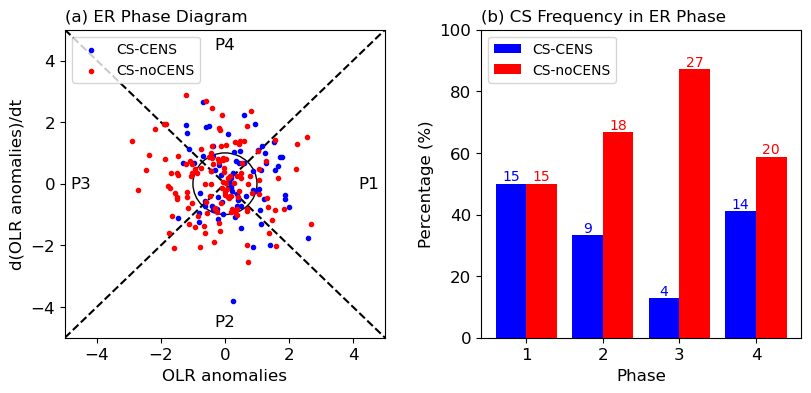

In [9]:
fig=plt.figure(figsize=(9.5,4))
plt.subplot(121)
plt.title('(a) ER Phase Diagram', fontsize=12, loc='left')
plt.xlabel('OLR anomalies', fontsize=12)
plt.ylabel('d(OLR anomalies)/dt', fontsize=12)
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
for i, clr, labels  in zip([1,0],['b','r'],['CS-CENS','CS-noCENS']):
    tslice=csevt.loc[csevt.index.month.isin([12,1,2])]
    tslice=tslice[tslice['censevt']==i].index.values
    dataplot=tglidxermrg.loc[tslice]
    plt.scatter(dataplot['olrer'], dataplot['dtolrer'], c=clr, marker=".", zorder=4, label=labels)

#Add line and circle
plt.axline(xy1=(0, 0), slope=1, linestyle='--', c='k', zorder=2)
plt.axline(xy1=(0, 0), slope=-1, linestyle='--', c='k', zorder=2)
circle1=plt.Circle((0, 0), (1), color='k', fill=False, zorder=2)
plt.gca().add_patch(circle1)

#Add phase information
plt.text(4.5, 0, 'P1', horizontalalignment='center', verticalalignment='center', fontsize=12)
plt.text(0, -4.5, 'P2', horizontalalignment='center', verticalalignment='center', fontsize=12)
plt.text(-4.5, 0, 'P3', horizontalalignment='center', verticalalignment='center', fontsize=12)
plt.text(0, 4.5, 'P4', horizontalalignment='center', verticalalignment='center', fontsize=12)

plt.legend(loc='upper left')

plt.subplot(122)
amper=np.sqrt(tglidxermrg['dtolrer']**2+tglidxermrg['olrer']**2)
anger=np.rad2deg(np.arctan2(tglidxermrg['dtolrer'],tglidxermrg['olrer']))
pher=np.empty([len(anger)])
for i in range(len(anger)):
    if (anger[i]<=45 and anger[i]>-45):
        pher[i]=1
    elif (anger[i]<=-45 and anger[i]>-135):
        pher[i]=2
    elif (anger[i]<=-135 or anger[i]>135):
        pher[i]=3
    elif (anger[i]<=135 and anger[i]>45):
        pher[i]=4
tglidxermrg['phase er']=pher
tglidxermrg['amplitude er']=amper

#Buat persentase/jumlah kejadian [histogram] CS-CENS dan CS-noCENS tiap fase
tslice=csevt.loc[csevt.index.month.isin([12, 1,2])]
tcscens=tslice[tslice['censevt']==1].index.values
datacscens=tglidxermrg.loc[tcscens]
datacscens=datacscens[datacscens['amplitude er']>=1]
ncscens=[]
for ph in np.arange(1,4.1,1):
    ncscens.append(datacscens[datacscens['phase er']==ph]['phase er'].count())
ncscens=np.array(ncscens)
    
tcsncens=tslice[tslice['censevt']==0].index.values
datacsncens=tglidxermrg.loc[tcsncens]
datacsncens=datacsncens[datacsncens['amplitude er']>=1]
ncsncens=[]
for ph in np.arange(1,4.1,1):
    ncsncens.append(datacsncens[datacsncens['phase er']==ph]['phase er'].count())
ncsncens=np.array(ncsncens)

plt.title('(b) CS Frequency in ER Phase', fontsize=12, loc='left')
plt.xlabel('Phase', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
#plt.xlim([-5,5])
plt.ylim([0,100])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
barcens=plt.bar(np.arange(1,5,1)-0.2, ncscens/(ncscens+ncsncens)*100, color='b', width=0.4, label='CS-CENS')
barnocens=plt.bar(np.arange(1,5,1)+0.2, ncsncens/(ncscens+ncsncens)*100, color='r', width=0.4, label='CS-noCENS')
plt.legend()
plt.bar_label(barcens, labels=ncscens, color='b')
plt.bar_label(barnocens, labels=ncsncens, color='r')
plt.subplots_adjust(wspace=0.3)
plt.plot()
#plt.savefig('E:\. Disertasi S3 Bismillah\Publikasi\Paper Hubungan CS dan CENS\Gambar/6_ER Freq.jpg', dpi=400, bbox_inches='tight')

[]

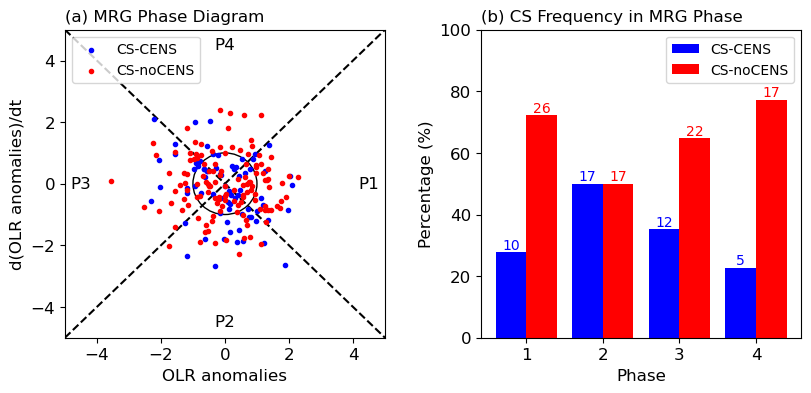

In [13]:
fig=plt.figure(figsize=(9.5,4))
plt.subplot(121)
plt.title('(a) MRG Phase Diagram', fontsize=12, loc='left')
plt.xlabel('OLR anomalies', fontsize=12)
plt.ylabel('d(OLR anomalies)/dt', fontsize=12)
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
for i, clr, labels  in zip([1,0],['b','r'],['CS-CENS','CS-noCENS']):
    tslice=csevt.loc[csevt.index.month.isin([12,1,2])]
    tslice=tslice[tslice['censevt']==i].index.values
    dataplot=tglidxermrg.loc[tslice]
    plt.scatter(dataplot['olrmrg'], dataplot['dtolrmrg'], c=clr, marker=".", zorder=4, label=labels)

#Add line and circle
plt.axline(xy1=(0, 0), slope=1, linestyle='--', c='k', zorder=2)
plt.axline(xy1=(0, 0), slope=-1, linestyle='--', c='k', zorder=2)
circle1=plt.Circle((0, 0), (1), color='k', fill=False, zorder=2)
plt.gca().add_patch(circle1)

#Add phase information
plt.text(4.5, 0, 'P1', horizontalalignment='center', verticalalignment='center', fontsize=12)
plt.text(0, -4.5, 'P2', horizontalalignment='center', verticalalignment='center', fontsize=12)
plt.text(-4.5, 0, 'P3', horizontalalignment='center', verticalalignment='center', fontsize=12)
plt.text(0, 4.5, 'P4', horizontalalignment='center', verticalalignment='center', fontsize=12)

plt.legend(loc='upper left')

plt.subplot(122)
amper=np.sqrt(tglidxermrg['dtolrmrg']**2+tglidxermrg['olrmrg']**2)
anger=np.rad2deg(np.arctan2(tglidxermrg['dtolrmrg'],tglidxermrg['olrmrg']))
pher=np.empty([len(anger)])
for i in range(len(anger)):
    if (anger[i]<=45 and anger[i]>-45):
        pher[i]=1
    elif (anger[i]<=-45 and anger[i]>-135):
        pher[i]=2
    elif (anger[i]<=-135 or anger[i]>135):
        pher[i]=3
    elif (anger[i]<=135 and anger[i]>45):
        pher[i]=4
tglidxermrg['phase mrg']=pher
tglidxermrg['amplitude mrg']=amper

#Buat persentase/jumlah kejadian [histogram] CS-CENS dan CS-noCENS tiap fase
tslice=csevt.loc[csevt.index.month.isin([12, 1,2])]
tcscens=tslice[tslice['censevt']==1].index.values
datacscens=tglidxermrg.loc[tcscens]
datacscens=datacscens[datacscens['amplitude mrg']>=1]
ncscens=[]
for ph in np.arange(1,4.1,1):
    ncscens.append(datacscens[datacscens['phase mrg']==ph]['phase mrg'].count())
ncscens=np.array(ncscens)
    
tcsncens=tslice[tslice['censevt']==0].index.values
datacsncens=tglidxermrg.loc[tcsncens]
datacsncens=datacsncens[datacsncens['amplitude mrg']>=1]
ncsncens=[]
for ph in np.arange(1,4.1,1):
    ncsncens.append(datacsncens[datacsncens['phase mrg']==ph]['phase mrg'].count())
ncsncens=np.array(ncsncens)

plt.title('(b) CS Frequency in MRG Phase', fontsize=12, loc='left')
plt.xlabel('Phase', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
#plt.xlim([-5,5])
plt.ylim([0,100])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
barcens=plt.bar(np.arange(1,5,1)-0.2, ncscens/(ncscens+ncsncens)*100, color='b', width=0.4, label='CS-CENS')
barnocens=plt.bar(np.arange(1,5,1)+0.2, ncsncens/(ncscens+ncsncens)*100, color='r', width=0.4, label='CS-noCENS')
plt.legend()
plt.bar_label(barcens, labels=ncscens, color='b')
plt.bar_label(barnocens, labels=ncsncens, color='r')
plt.subplots_adjust(wspace=0.3)
plt.plot()


[]

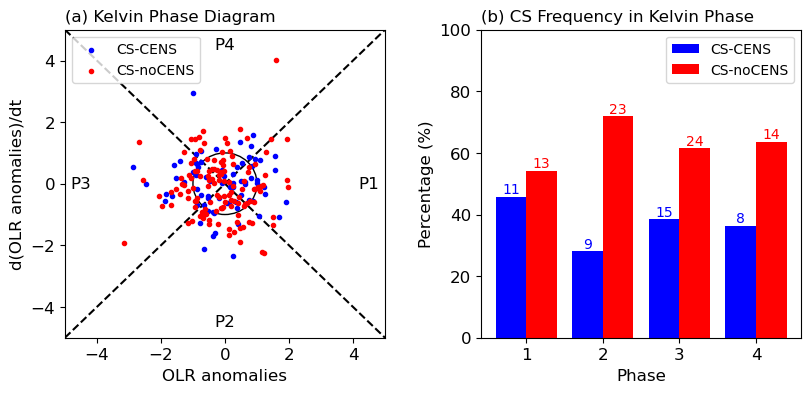

In [11]:
fig=plt.figure(figsize=(9.5,4))
plt.subplot(121)
plt.title('(a) Kelvin Phase Diagram', fontsize=12, loc='left')
plt.xlabel('OLR anomalies', fontsize=12)
plt.ylabel('d(OLR anomalies)/dt', fontsize=12)
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
for i, clr, labels  in zip([1,0],['b','r'],['CS-CENS','CS-noCENS']):
    tslice=csevt.loc[csevt.index.month.isin([12,1,2])]
    tslice=tslice[tslice['censevt']==i].index.values
    dataplot=tglidxkelvin.loc[tslice]
    plt.scatter(dataplot['olrkl'], dataplot['dtolrkl'], c=clr, marker=".", zorder=4, label=labels)

#Add line and circle
plt.axline(xy1=(0, 0), slope=1, linestyle='--', c='k', zorder=2)
plt.axline(xy1=(0, 0), slope=-1, linestyle='--', c='k', zorder=2)
circle1=plt.Circle((0, 0), (1), color='k', fill=False, zorder=2)
plt.gca().add_patch(circle1)

#Add phase information
plt.text(4.5, 0, 'P1', horizontalalignment='center', verticalalignment='center', fontsize=12)
plt.text(0, -4.5, 'P2', horizontalalignment='center', verticalalignment='center', fontsize=12)
plt.text(-4.5, 0, 'P3', horizontalalignment='center', verticalalignment='center', fontsize=12)
plt.text(0, 4.5, 'P4', horizontalalignment='center', verticalalignment='center', fontsize=12)

plt.legend(loc='upper left')

plt.subplot(122)
ampkl=np.sqrt(tglidxkelvin['dtolrkl']**2+tglidxkelvin['olrkl']**2)
angkl=np.rad2deg(np.arctan2(tglidxkelvin['dtolrkl'],tglidxkelvin['olrkl']))
phkl=np.empty([len(angkl)])
for i in range(len(angkl)):
    if (angkl[i]<=45 and angkl[i]>-45):
        phkl[i]=1
    elif (angkl[i]<=-45 and angkl[i]>-135):
        phkl[i]=2
    elif (angkl[i]<=-135 or angkl[i]>135):
        phkl[i]=3
    elif (angkl[i]<=135 and angkl[i]>45):
        phkl[i]=4
tglidxkelvin['phase kl']=phkl
tglidxkelvin['amplitude kl']=ampkl

#Buat persentase/jumlah kejadian [histogram] CS-CENS dan CS-noCENS tiap fase
tslice=csevt.loc[csevt.index.month.isin([12, 1,2])]
tcscens=tslice[tslice['censevt']==1].index.values
datacscens=tglidxkelvin.loc[tcscens]
datacscens=datacscens[datacscens['amplitude kl']>=1]
ncscens=[]
for ph in np.arange(1,4.1,1):
    ncscens.append(datacscens[datacscens['phase kl']==ph]['phase kl'].count())
ncscens=np.array(ncscens)
    
tcsncens=tslice[tslice['censevt']==0].index.values
datacsncens=tglidxkelvin.loc[tcsncens]
datacsncens=datacsncens[datacsncens['amplitude kl']>=1]
ncsncens=[]
for ph in np.arange(1,4.1,1):
    ncsncens.append(datacsncens[datacsncens['phase kl']==ph]['phase kl'].count())
ncsncens=np.array(ncsncens)

plt.title('(b) CS Frequency in Kelvin Phase', fontsize=12, loc='left')
plt.xlabel('Phase', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
#plt.xlim([-5,5])
plt.ylim([0,100])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
barcens=plt.bar(np.arange(1,5,1)-0.2, ncscens/(ncscens+ncsncens)*100, color='b', width=0.4, label='CS-CENS')
barnocens=plt.bar(np.arange(1,5,1)+0.2, ncsncens/(ncscens+ncsncens)*100, color='r', width=0.4, label='CS-noCENS')
plt.legend()
plt.bar_label(barcens, labels=ncscens, color='b')
plt.bar_label(barnocens, labels=ncsncens, color='r')
plt.subplots_adjust(wspace=0.3)
plt.plot()


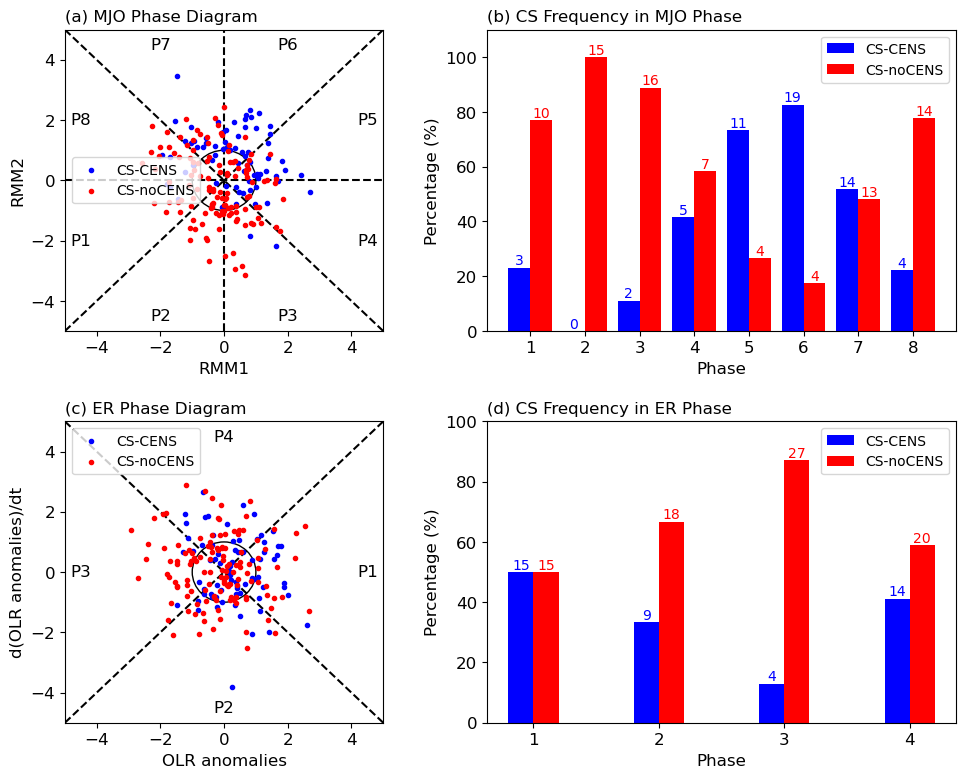

In [26]:
plt.figure(figsize=(11.5,9))
plt.subplot(231)
plt.title('(a) MJO Phase Diagram', fontsize=12, loc='left')
plt.xlabel('RMM1', fontsize=12)
plt.ylabel('RMM2', fontsize=12)
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
for i, clr, labels  in zip([1,0],['b','r'],['CS-CENS','CS-noCENS']):
    tslice=csevt.loc[csevt.index.month.isin([12,1,2])]
    tslice=tslice[tslice['censevt']==i].index.values
    dataplot=mjoevt.loc[tslice]
    plt.scatter(dataplot['RMM1'], dataplot['RMM2'], c=clr, marker=".", zorder=4, label=labels)

#Add line and circle
plt.axhline(y=0, linestyle='--', c='k', zorder=2)
plt.axvline(x=0, linestyle='--', c='k', zorder=2)
plt.axline(xy1=(0, 0), slope=1, linestyle='--', c='k', zorder=2)
plt.axline(xy1=(0, 0), slope=-1, linestyle='--', c='k', zorder=2)
circle1=plt.Circle((0, 0), (1), color='k', fill=False, zorder=2)
plt.gca().add_patch(circle1)


#Add phase information
plt.text(2, -4.5, 'P3', horizontalalignment='center', verticalalignment='center', fontsize=12)
plt.text(-2, -4.5, 'P2', horizontalalignment='center', verticalalignment='center', fontsize=12)
plt.text(-2, 4.5, 'P7', horizontalalignment='center', verticalalignment='center', fontsize=12)
plt.text(2, 4.5, 'P6', horizontalalignment='center', verticalalignment='center', fontsize=12)
plt.text(4.5, 2, 'P5', horizontalalignment='center', verticalalignment='center', fontsize=12)
plt.text(4.5, -2, 'P4', horizontalalignment='center', verticalalignment='center', fontsize=12)
plt.text(-4.5, 2, 'P8', horizontalalignment='center', verticalalignment='center', fontsize=12)
plt.text(-4.5, -2, 'P1', horizontalalignment='center', verticalalignment='center', fontsize=12)

plt.legend(loc='center left')
plt.subplot(222)
tslice=csevt.loc[csevt.index.month.isin([12, 1,2])]
tcscens=tslice[tslice['censevt']==1].index.values
datacscens=mjoevt.loc[tcscens]
datacscens=datacscens[datacscens['amplitude']>=1]
ncscens=[]
for ph in np.arange(1,8.1,1):
    ncscens.append(datacscens[datacscens['phase']==ph]['phase'].count())
ncscens=np.array(ncscens)
    
tcsncens=tslice[tslice['censevt']==0].index.values
datacsncens=mjoevt.loc[tcsncens]
datacsncens=datacsncens[datacsncens['amplitude']>=1]
ncsncens=[]
for ph in np.arange(1,8.1,1):
    ncsncens.append(datacsncens[datacsncens['phase']==ph]['phase'].count())
ncsncens=np.array(ncsncens)

plt.title('(b) CS Frequency in MJO Phase', fontsize=12, loc='left')
plt.xlabel('Phase', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
#plt.xlim([-5,5])
plt.ylim([0,110])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
barcens=plt.bar(np.arange(1,9,1)-0.2, ncscens/(ncscens+ncsncens)*100, color='b', width=0.4, label='CS-CENS')
barnocens=plt.bar(np.arange(1,9,1)+0.2, ncsncens/(ncscens+ncsncens)*100, color='r', width=0.4, label='CS-noCENS')
plt.legend()
plt.plot()
plt.bar_label(barcens, labels=ncscens, color='b')
plt.bar_label(barnocens, labels=ncsncens, color='r')



plt.subplot(234)
plt.title('(c) ER Phase Diagram', fontsize=12, loc='left')
plt.xlabel('OLR anomalies', fontsize=12)
plt.ylabel('d(OLR anomalies)/dt', fontsize=12)
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
for i, clr, labels  in zip([1,0],['b','r'],['CS-CENS','CS-noCENS']):
    tslice=csevt.loc[csevt.index.month.isin([12,1,2])]
    tslice=tslice[tslice['censevt']==i].index.values
    dataplot=tglidxermrg.loc[tslice]
    plt.scatter(dataplot['olrer'], dataplot['dtolrer'], c=clr, marker=".", zorder=4, label=labels)

#Add line and circle
plt.axline(xy1=(0, 0), slope=1, linestyle='--', c='k', zorder=2)
plt.axline(xy1=(0, 0), slope=-1, linestyle='--', c='k', zorder=2)
circle1=plt.Circle((0, 0), (1), color='k', fill=False, zorder=2)
plt.gca().add_patch(circle1)

#Add phase information
plt.text(4.5, 0, 'P1', horizontalalignment='center', verticalalignment='center', fontsize=12)
plt.text(0, -4.5, 'P2', horizontalalignment='center', verticalalignment='center', fontsize=12)
plt.text(-4.5, 0, 'P3', horizontalalignment='center', verticalalignment='center', fontsize=12)
plt.text(0, 4.5, 'P4', horizontalalignment='center', verticalalignment='center', fontsize=12)

plt.legend(loc='upper left')

plt.subplot(224)
amper=np.sqrt(tglidxermrg['dtolrer']**2+tglidxermrg['olrer']**2)
anger=np.rad2deg(np.arctan2(tglidxermrg['dtolrer'],tglidxermrg['olrer']))
pher=np.empty([len(anger)])
for i in range(len(anger)):
    if (anger[i]<=45 and anger[i]>-45):
        pher[i]=1
    elif (anger[i]<=-45 and anger[i]>-135):
        pher[i]=2
    elif (anger[i]<=-135 or anger[i]>135):
        pher[i]=3
    elif (anger[i]<=135 and anger[i]>45):
        pher[i]=4
tglidxermrg['phase er']=pher
tglidxermrg['amplitude er']=amper

#Buat persentase/jumlah kejadian [histogram] CS-CENS dan CS-noCENS tiap fase
tslice=csevt.loc[csevt.index.month.isin([12, 1,2])]
tcscens=tslice[tslice['censevt']==1].index.values
datacscens=tglidxermrg.loc[tcscens]
datacscens=datacscens[datacscens['amplitude er']>=1]
ncscens=[]
for ph in np.arange(1,4.1,1):
    ncscens.append(datacscens[datacscens['phase er']==ph]['phase er'].count())
ncscens=np.array(ncscens)
    
tcsncens=tslice[tslice['censevt']==0].index.values
datacsncens=tglidxermrg.loc[tcsncens]
datacsncens=datacsncens[datacsncens['amplitude er']>=1]
ncsncens=[]
for ph in np.arange(1,4.1,1):
    ncsncens.append(datacsncens[datacsncens['phase er']==ph]['phase er'].count())
ncsncens=np.array(ncsncens)

plt.title('(d) CS Frequency in ER Phase', fontsize=12, loc='left')
plt.xlabel('Phase', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
#plt.xlim([-5,5])
plt.ylim([0,100])
plt.xticks(np.arange(1,4.1,1),['1','2','3','4'],fontsize=12)
plt.yticks(fontsize=12)
barcens=plt.bar(np.arange(1,5,1)-0.1, ncscens/(ncscens+ncsncens)*100, color='b', width=0.2, label='CS-CENS')
barnocens=plt.bar(np.arange(1,5,1)+0.1, ncsncens/(ncscens+ncsncens)*100, color='r', width=0.2, label='CS-noCENS')
plt.legend()
plt.bar_label(barcens, labels=ncscens, color='b')
plt.bar_label(barnocens, labels=ncsncens, color='r')

plt.subplots_adjust(wspace=-0.1, hspace=0.3)


#plt.savefig('E:\. Disertasi S3 Bismillah\Publikasi\Paper Hubungan CS dan CENS\Gambar/6_MJO and Freq.jpg', dpi=400, bbox_inches='tight')